In [1]:
library(ggplot2)
library(dplyr)
library(gplots)
library(pvclust)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(heatmap.plus)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessage

# Norm(DLX1 - 25% TBR1)

In [18]:
casted_MAF_VarBySample4 <- read.csv("./7669_RevisionD-T.csv", header=T, sep="," ,row.names=1)
casted_MAF_VarBySample4<-casted_MAF_VarBySample4[!(casted_MAF_VarBySample4$Cell_Type %in% c("DLX1","Cont-CT")),]

In [19]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample4[,-1:-4])))

In [20]:
myCol<-as.data.frame(t(na.omit(t(casted_MAF_VarBySample4[,1:4]))))
myCol$Hemisphere_col[myCol$Hemisphere %in% c("R")]<-"Red"
myCol$Hemisphere_col[myCol$Hemisphere %in% c("L")]<-"Blue"
myCol$Region_col[myCol$Region %in% c("EC")]<-"#F0A0FF"
myCol$Region_col[myCol$Region %in% c("F")]<-"#0075DC"
myCol$Region_col[myCol$Region %in% c("I")]<-"#993F00"
myCol$Region_col[myCol$Region %in% c("mO")]<-"#4C005C"
myCol$Region_col[myCol$Region %in% c("O")]<-"#FF5005"
myCol$Region_col[myCol$Region %in% c("P")]<-"#FFE100"
myCol$Region_col[myCol$Region %in% c("T")]<-"#2BCE48"
myCol$Region_col[myCol$Region %in% c("CC")]<-"#808080"

#myCol$Cell_Type[myCol$Cell_Type %in% c("DLX1")]<-"#F06666"
myCol$Cell_Type[myCol$Cell_Type %in% c("COUPTF2")]<-"#5FBEEB"
myCol$Cell_Type[myCol$Cell_Type %in% c("TBR1")]<-"#7BBE42"
#myCol$Cell_Type[myCol$Cell_Type %in% c("Cont-CT")]<-"black"
myCol$Cell_Type[myCol$Cell_Type %in% c("D-T")]<-"grey"

myCol2<-as.matrix(cbind(myCol$Hemisphere_col,myCol$Cell_Type,myCol$Region_col))
colnames(myCol2)<-c("Hemisphere","Cell_Type","Region")

In [21]:
myCol

,Hemisphere,Region,Organ,Cell_Type,Hemisphere_col,Region_col
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7669_R_CC_Mid_TBR1,R,CC,CTX,#7BBE42,Red,#808080
7669_R_CC_Mid_D-T,R,CC,CTX,grey,Red,#808080
7669_L_CC_2_COUPTF2,L,CC,CTX,#5FBEEB,Blue,#808080
7669_R_CCMid_COUPTF2,R,CC,CTX,#5FBEEB,Red,#808080
7669_R_EC_TBR1,L,EC,CTX,#7BBE42,Blue,#F0A0FF
7669_R_EC_D-T,L,EC,CTX,grey,Blue,#F0A0FF
7669_L_EC_COUPTF2,R,EC,CTX,#5FBEEB,Red,#F0A0FF
7669_R_EC_COUPTF2,L,EC,CTX,#5FBEEB,Blue,#F0A0FF
7669_L_F_1_TBR1,L,F,CTX,#7BBE42,Blue,#0075DC


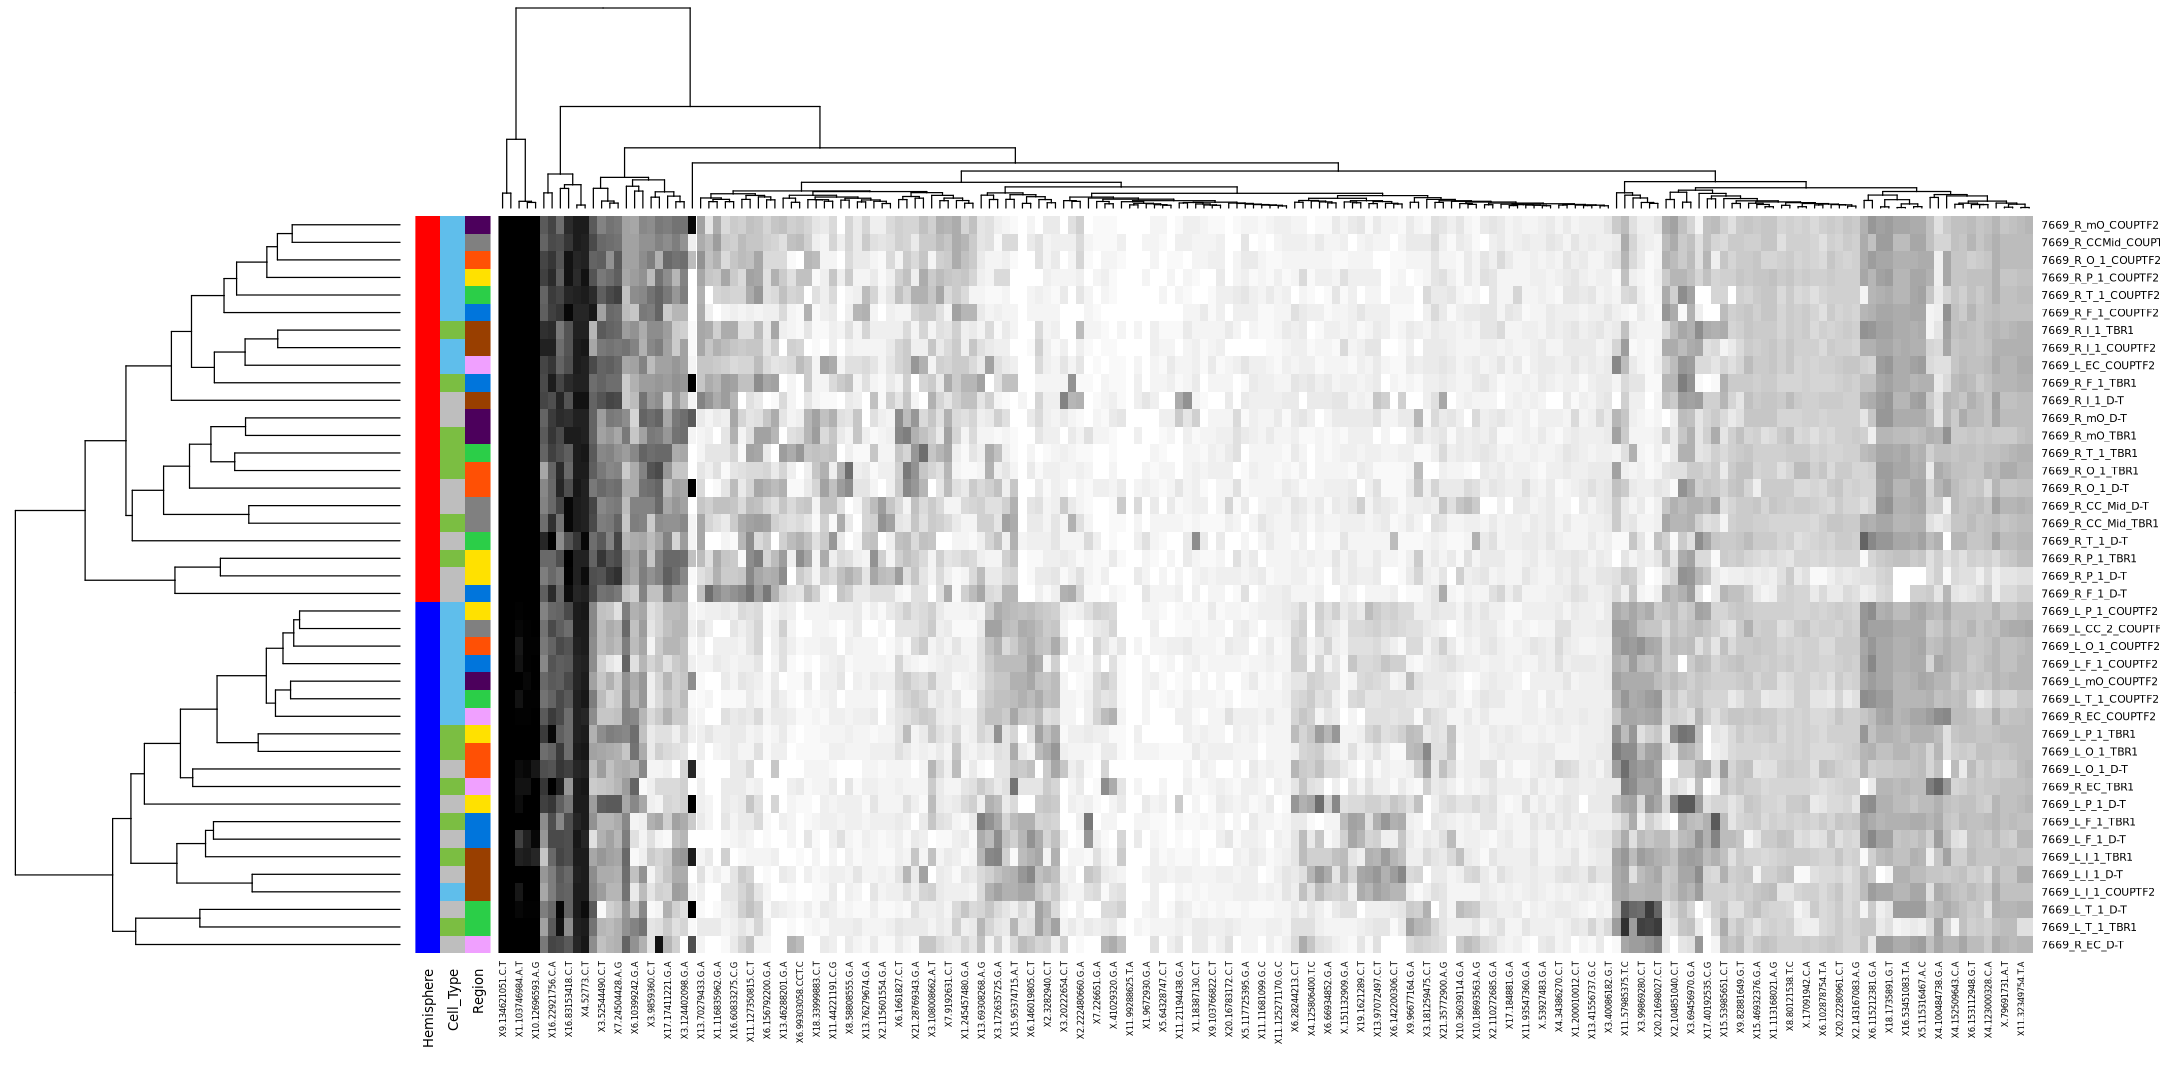

In [24]:
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

In [25]:
pdf(file="7669_deconvolved_DLX1_heatmap.pdf",height=9,width=18)
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()               

png 
  2

In [26]:
pdf(file="7669_deconvolved_DLX1_heatmap_scalebar.pdf",height=9,width=18)
options(repr.plot.width=18, repr.plot.height=9)
Colors = c("white","Black","Black")
Colors = colorRampPalette(Colors)(100)
heatmap.2(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             #RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()    

png 
  2